# 2. Thực hiện xử lí dữ liệu
## Importing library

In [7]:
import pandas as pd 
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from dataCRUD import dataProcessing
from dataCLEANING import aggregateData,sortDataCol,deleteMissData,deleteOutliers
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning) #bỏ qua các dòng warning

Thống kê các giá trị có trong file:

Thông tin về cột Student_ID': 
Student_ID
501 501    1
1          1
2          1
3          1
484        1
          ..
9          1
8          1
7          1
6          1
5          1
Name: count, Length: 500, dtype: int64

Thông tin về cột Age': 
Age
21    75
25    72
18    71
20    64
23    62
24    59
22    51
19    46
Name: count, dtype: int64

Thông tin về cột Gender': 
Gender
Male      186
Female    166
Other     148
Name: count, dtype: int64

Thông tin về cột University_Year': 
University_Year
2nd Year    131
3rd Year    131
1st Year    125
4th Year    112
2ndYear       1
Name: count, dtype: int64

Thông tin về cột Sleep_Duration': 
Sleep_Duration
4.1    16
8.4    16
4.4    15
4.9    14
7.5    14
5.2    14
5.1    14
4.2    13
7.0    13
8.0    13
8.7    13
7.3    12
6.4    12
4.8    11
6.1    11
7.4    11
6.0    11
8.3    11
7.1    11
5.3    10
4.7    10
7.2    10
4.3    10
6.8    10
5.4    10
8.9    10
8.1    10
7.7     9
7.9     9
5.7     9

TypeError: '>=' not supported between instances of 'str' and 'int'

## Đọc dữ liệu từ file CSV và chuẩn bị các thao tác với dataset


In [ ]:
Data_Frame = dataProcessing('student_sleep_patterns.csv')

## In dữ liệu

In [ ]:
Data_Frame.outputData()

             0    1       2                3               4            5   \
0    Student_ID  Age  Gender  University_Year  Sleep_Duration  Study_Hours   
1             1   24   Other         2nd Year             7.7          7.9   
2             2   21    Male         1st Year             6.3          6.0   
3             3   22    Male         4th Year             5.1          6.7   
4             4   24   Other         4th Year             6.3          8.6   
..          ...  ...     ...              ...             ...          ...   
497         497   20    Male         2nd Year             8.9          7.7   
498         498   21    Male         3rd Year             5.7          6.4   
499         499   18  Female         2nd Year             4.9          0.5   
500     501 501   24    Male          2ndYear             5.1          9.3   
501   502   501   24    Male          2ndYear             5.1          9.3   

              6                7                  8            

## Colomns
**Student_ID**: Unique identifier for each student (integer).

**Age**: Age of the student in years (integer).

**Gender**: Gender of the student (categorical: 'Male', 'Female', 'Other').

**University_Year**: The student's current year of university (categorical: '1st Year', '2nd Year', '3rd Year', '4th Year').

**Sleep_Duration**: Total hours of sleep per night (float).

**Study_Hours**: Average number of hours spent studying per day (float).

**Screen_Time**: Average number of hours spent on screens (excluding studying) per day (float).

**Caffeine_Intake**: Average number of caffeinated beverages consumed per day (integer).

**Physical_Activity**: Average minutes spent on physical activity per day (integer).

**Sleep_Quality**: Subjective rating of sleep quality on a scale of 1 to 10 (1 being the worst, 10 being the best) (integer).

**Weekday_Sleep_Start**: Time the student typically goes to sleep on weekdays (float, in 24-hour format, e.g., 23.00 is 11 PM).

**Weekend_Sleep_Start**: Time the student typically goes to sleep on weekends (float, in 24-hour format).

**Weekday_Sleep_End**: Time the student typically wakes up on weekdays (float, in 24-hour format).

**Weekend_Sleep_End**: Time the student typically wakes up on weekends (float, in 24-hour format).

In [ ]:
data = Data_Frame.getData()
column_names=["Student_ID", "Age", "Gender", "University_Year", "Sleep_Duration", "Study_Hours", "Screen_Time", "Caffeine_Intake", "Physical_Activity", "Sleep_Quality", "Weekday_Sleep_Start", "Weekend_Sleep_Start", "Weekday_Sleep_End", "Weekend_Sleep_End"]
data = pd.DataFrame(data, columns=column_names)
data

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
1,1,24,Other,2nd Year,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06
2,2,21,Male,1st Year,6.3,6.0,1.9,5,74,2,8.73,7.1,8.21,10.21
3,3,22,Male,4th Year,5.1,6.7,3.9,5,53,5,20.0,20.47,6.88,10.92
4,4,24,Other,4th Year,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,497,20,Male,2nd Year,8.9,7.7,3.5,3,40,4,1.22,15.54,5.85,7.23
498,498,21,Male,3rd Year,5.7,6.4,3.9,1,68,10,9.94,2.25,5.46,10.72
499,499,18,Female,2nd Year,4.9,0.5,3.5,0,12,2,19.1,15.49,8.35,7.2
500,501 501,24,Male,2ndYear,5.1,9.3,1.9,4,110,4,17.42,8.43,6.93,10.78


## Data CRUD

### Add data

In [ ]:
while True:
    new_data = input("Enter new comma-separated values' record: ").split(',')
    if len(new_data) == len(Data_Frame.getSampleData()):
        Data_Frame.addData(new_data)
        break
    else:
        print ("Invalid field count. Enter data with correct field count.")


Dữ liệu đã được thêm!


### Update data

In [ ]:
while True:
    Updated_Index = input("Input updated data's index: ")
    if Updated_Index.isdigit():
        Updated_Index = int(Updated_Index)
        if Updated_Index >= 0 and Updated_Index < len(Data_Frame.getData()):
            break
        else:
            print ("\nInvalid input. Please try again")
    else:
        print ("\nInvalid input. Please enter a number.")
while True:
    Updated_Data = input("Enter new comma-separated values' record: ").split(',')
    if len(Updated_Data) == len(Data_Frame.getSampleData()):
        Data_Frame.updateData(Updated_Index, Updated_Data)
        break
    else:
        print ("Invalid field count. Please enter data with correct field count.")

Dữ liệu đã được cập nhật!


### Delete data

In [ ]:
while True:
    Deleted_Index = input("Input deleted data's index: ")
    if Deleted_Index.isdigit():
        Deleted_Index = int(Deleted_Index)
        if Deleted_Index >= 0 and Deleted_Index < len(Data_Frame.getData()):
            break
        else:
            print ("Invalid input. Please choose again")
    else:
        print ("Invalid input. Please enter a number.")
Data_Frame.deleteData(Deleted_Index)

### Save data

In [ ]:
Data_Frame.saveData()

NameError: name 'Data_Frame' is not defined

## Data Cleaning

### Hàm 1: Thống kê dữ liệu của file

In [ ]:
aggregateData(Data_Frame)

Thống kê các giá trị có trong file:


AttributeError: 'dataProcessing' object has no attribute 'columns'

### Hàm 2: Sắp xếp dữ liệu theo cột (cột Age)

In [ ]:
cols = ['Age']
sortDataCol(Data_Frame, cols, greater=True)

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
498,499,18,Female,2nd Year,4.9,0.5,3.5,0,12,2,19.10,15.49,8.35,7.20
31,32,18,Female,1st Year,4.3,7.1,3.2,4,106,6,9.64,3.44,5.87,9.01
476,477,18,Female,4th Year,7.5,4.2,3.8,3,56,6,5.55,10.14,7.84,7.32
467,468,18,Other,4th Year,5.0,1.0,1.0,0,52,9,16.67,17.70,5.90,8.80
478,479,18,Female,1st Year,7.6,7.9,1.3,1,39,9,9.04,18.56,6.26,7.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,144,25,Female,2nd Year,8.7,8.9,3.5,1,89,7,20.53,13.60,7.70,7.88
17,18,25,Other,3rd Year,6.1,5.1,1.7,3,17,10,14.71,6.37,5.10,7.47
5,6,25,Other,1st Year,4.9,12.0,3.2,3,96,9,9.80,18.83,5.04,10.51
490,491,25,Other,3rd Year,4.4,7.5,2.3,3,91,3,16.96,6.17,5.69,8.00


### Hàm 3: Hàm để loại bỏ những dòng bị thiếu dữ liệu NULL (NaN)

In [ ]:
deleteMissData(Data_Frame)

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,Other,2nd Year,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06
1,2,21,Male,1st Year,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21
2,3,22,Male,4th Year,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92
3,4,24,Other,4th Year,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42
4,5,20,Male,4th Year,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,24,Male,2nd Year,5.1,9.3,1.9,4,110,4,17.42,8.43,6.93,10.78
496,497,20,Male,2nd Year,8.9,7.7,3.5,3,40,4,1.22,15.54,5.85,7.23
497,498,21,Male,3rd Year,5.7,6.4,3.9,1,68,10,9.94,2.25,5.46,10.72
498,499,18,Female,2nd Year,4.9,0.5,3.5,0,12,2,19.10,15.49,8.35,7.20


### Hàm 4: Xử lí các số liệu ngoại lai 

In [ ]:
deleteOutliers(Data_Frame)

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,Other,2nd Year,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06
1,2,21,Male,1st Year,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21
2,3,22,Male,4th Year,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92
3,4,24,Other,4th Year,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42
4,5,20,Male,4th Year,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,24,Male,2nd Year,5.1,9.3,1.9,4,110,4,17.42,8.43,6.93,10.78
496,497,20,Male,2nd Year,8.9,7.7,3.5,3,40,4,1.22,15.54,5.85,7.23
497,498,21,Male,3rd Year,5.7,6.4,3.9,1,68,10,9.94,2.25,5.46,10.72
498,499,18,Female,2nd Year,4.9,0.5,3.5,0,12,2,19.10,15.49,8.35,7.20


## VISUALIZATION

In [ ]:
sns.set(style="whitegrid")

### Biểu đồ phân phối thời gian ngủ

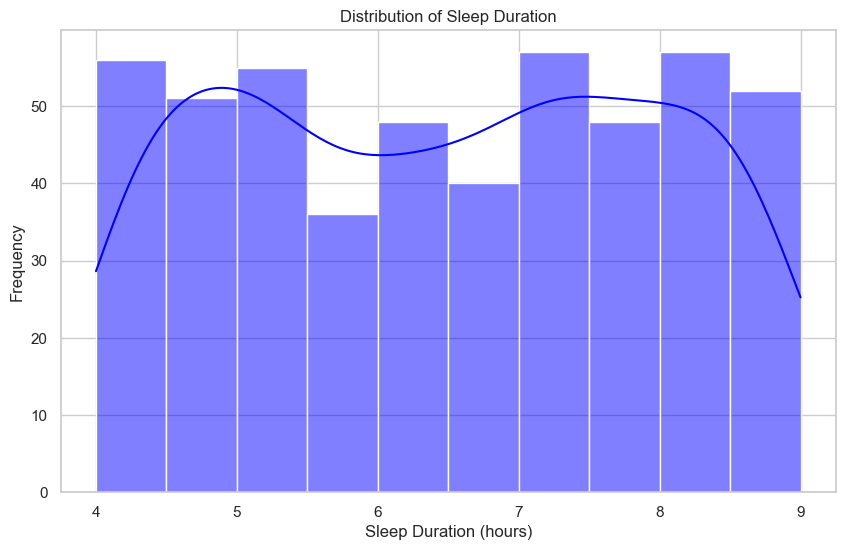

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Sleep_Duration'], kde=True, color="blue")
plt.title("Distribution of Sleep Duration")
plt.xlabel("Sleep Duration (hours)")
plt.ylabel("Frequency")
plt.show()

### Biểu đồ thời gian ngủ theo giới tính và năm học

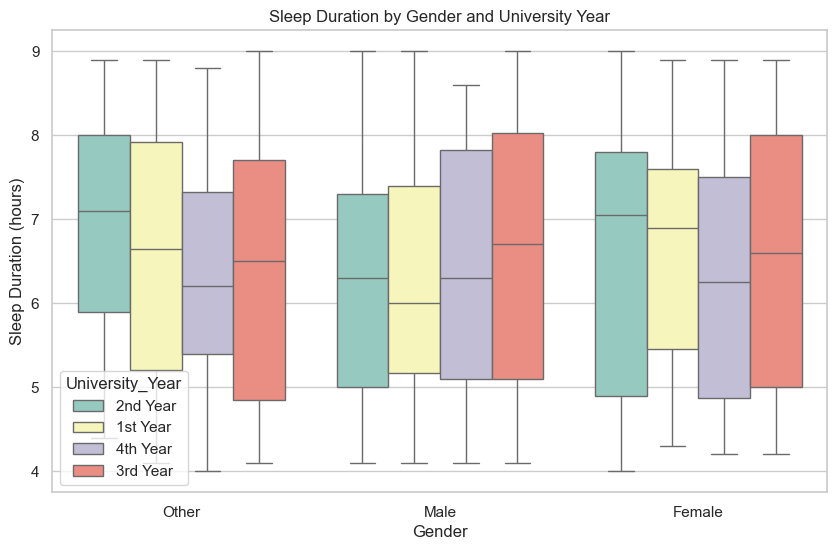

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="Gender", y="Sleep_Duration", hue="University_Year", palette="Set3")
plt.title("Sleep Duration by Gender and University Year")
plt.xlabel("Gender")
plt.ylabel("Sleep Duration (hours)")
plt.show()

### Biểu đồ mối quan hệ giữa thời gian ngủ và chất lượng giấc ngủ

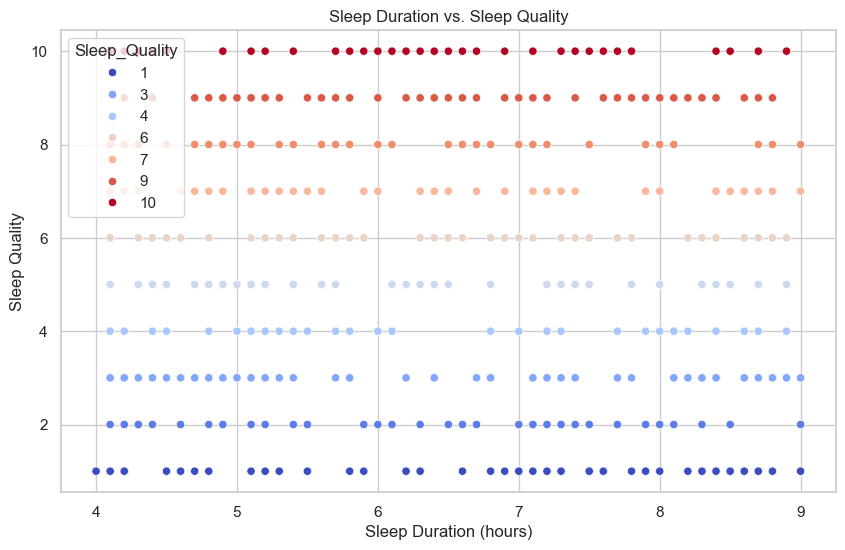

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="Sleep_Duration", y="Sleep_Quality", hue="Sleep_Quality", palette="coolwarm")
plt.title("Sleep Duration vs. Sleep Quality")
plt.xlabel("Sleep Duration (hours)")
plt.ylabel("Sleep Quality")
plt.show()

### Biểu đồ chất lượng giấc ngủ trung bình theo năm học

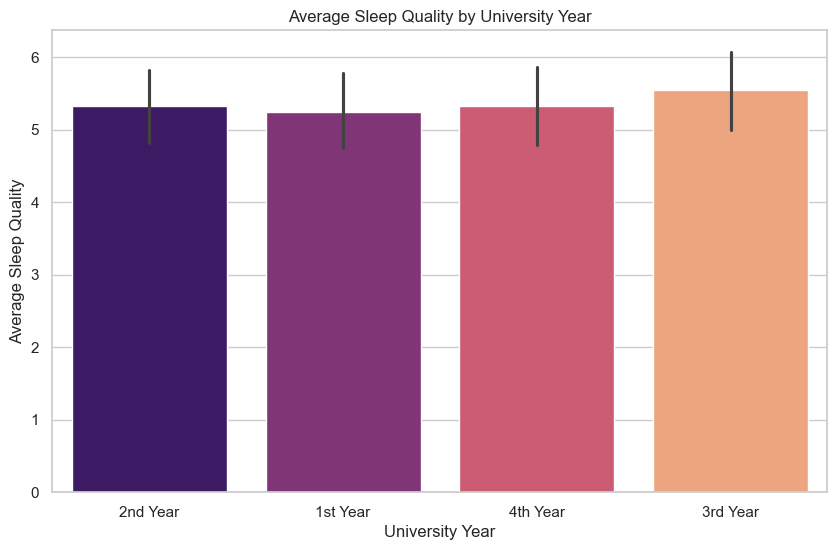

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x="University_Year", y="Sleep_Quality", palette="magma")
plt.title("Average Sleep Quality by University Year")
plt.xlabel("University Year")
plt.ylabel("Average Sleep Quality")
plt.show()

### Biểu đồ phân phối thời gian học 

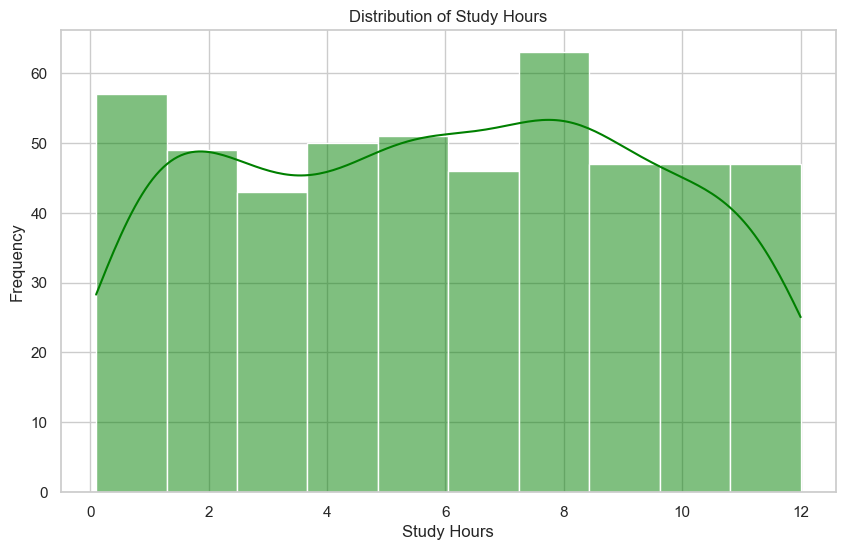

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Study_Hours'], kde=True, color="green")
plt.title("Distribution of Study Hours")
plt.xlabel("Study Hours")
plt.ylabel("Frequency")
plt.show()


### Biểu đồ phân phối hoạt động thể chất

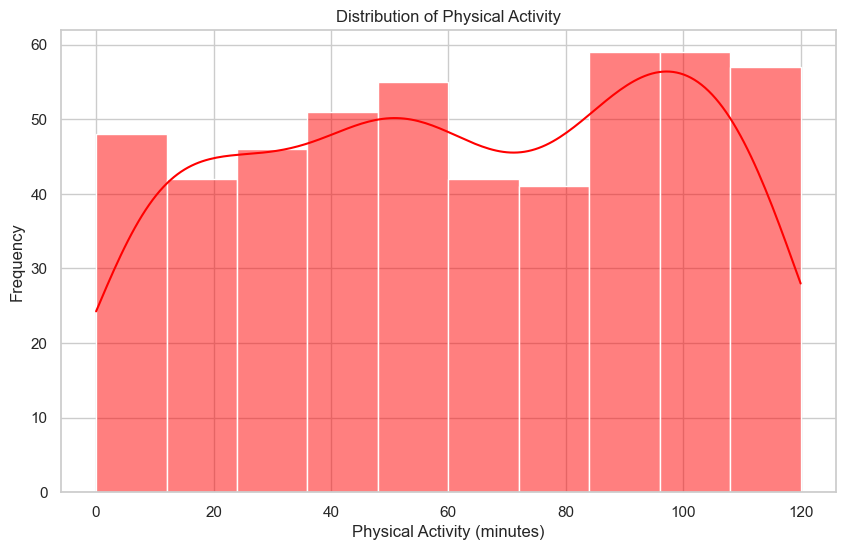

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Physical_Activity'], kde=True, color="red")
plt.title("Distribution of Physical Activity")
plt.xlabel("Physical Activity (minutes)")
plt.ylabel("Frequency")
plt.show()

### Biểu đồ thời gian bắt đầu ngủ trong tuần và cuối tuần

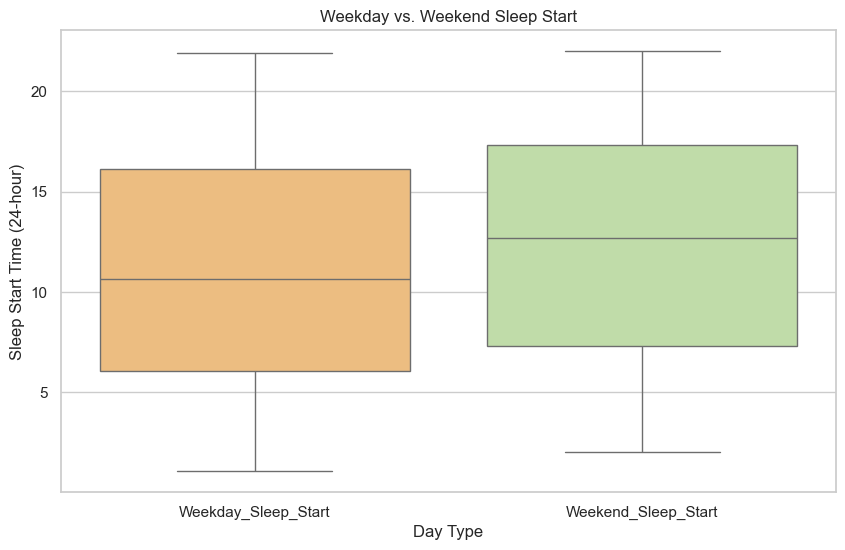

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Weekday_Sleep_Start', 'Weekend_Sleep_Start']].melt(), x='variable', y='value', palette="Spectral")
plt.title("Weekday vs. Weekend Sleep Start")
plt.xlabel("Day Type")
plt.ylabel("Sleep Start Time (24-hour)")
plt.show()

### Biểu đồ thời gian bắt đầu và kết thúc giấc ngủ trong tuần

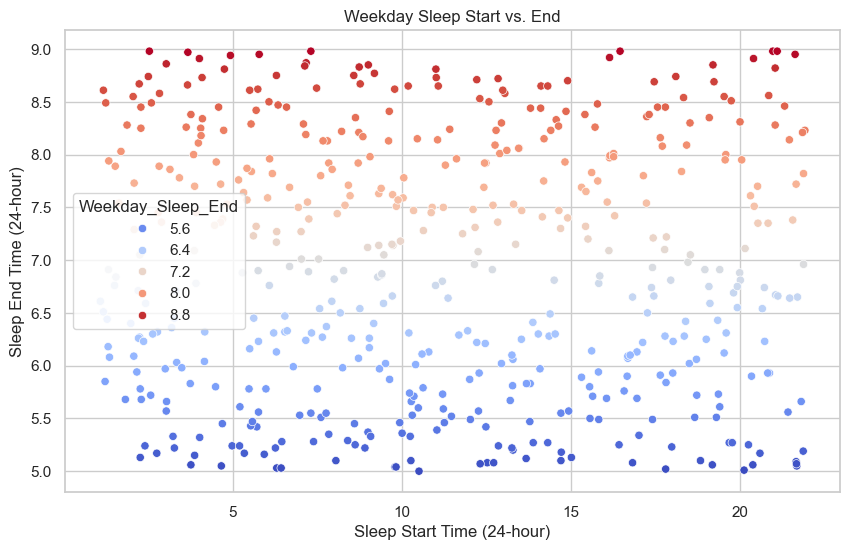

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="Weekday_Sleep_Start", y="Weekday_Sleep_End", hue="Weekday_Sleep_End", palette="coolwarm")
plt.title("Weekday Sleep Start vs. End")
plt.xlabel("Sleep Start Time (24-hour)")
plt.ylabel("Sleep End Time (24-hour)")
plt.show()


### Biểu đồ thời gian học và thời gian ngủ 

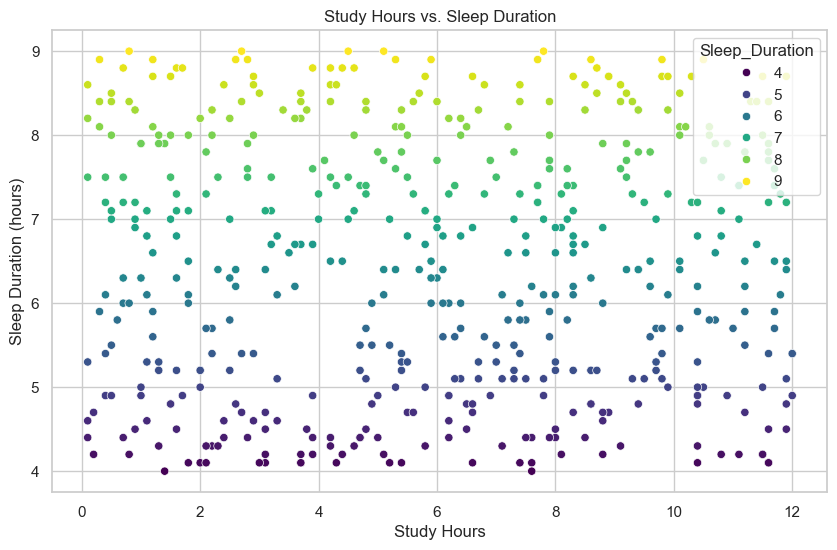

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="Study_Hours", y="Sleep_Duration", hue="Sleep_Duration", palette="viridis")
plt.title("Study Hours vs. Sleep Duration")
plt.xlabel("Study Hours")
plt.ylabel("Sleep Duration (hours)")
plt.show()